# 0.0. Imports

In [2]:
import pandas as pd
import numpy as np
import inflection
import math
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
# setting seaborn figure sizes to occupy the whole screen
sns.set(rc={'figure.figsize':(14, 9)})

## 0.1. Helper functions

## 0.2. Loading data

In [4]:
df_sales_raw = pd.read_csv("data/train.csv", low_memory=False)
df_store_raw = pd.read_csv("data/store.csv", low_memory=False)

# merge df's
df_raw = df_sales_raw.merge(df_store_raw, how="left", on="Store")

In [5]:
df_raw.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [6]:
df_raw.sample(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
910512,343,6,2013-04-06,5863,657,1,0,0,0,d,a,18650.0,4.0,2004.0,1,14.0,2014.0,"Jan,Apr,Jul,Oct"
323782,533,1,2014-09-29,11388,1036,1,1,0,0,a,c,5950.0,NaN,NaN,0,NaN,NaN,NaN
501194,230,2,2014-04-08,5684,809,1,0,0,0,d,c,6680.0,9.0,2013.0,0,NaN,NaN,NaN
149065,771,5,2015-03-20,6652,720,1,1,0,0,a,a,20640.0,9.0,2007.0,0,NaN,NaN,NaN
767765,316,1,2013-08-12,14448,1252,1,1,0,1,d,a,9000.0,8.0,2001.0,0,NaN,NaN,NaN


# 1.0. Data description

## 1.1. Rename Columns

In [7]:
df1 = df_raw.copy()

In [8]:
df1.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [9]:
cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval']
snakecase = lambda x: inflection.underscore(x)

# map returns an iterable, so it must be transformed into a list
cols_new = list( map( snakecase, cols_old ) )

# rename
df1.columns = cols_new
df1.columns

Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval'],
      dtype='object')

## 1.2. Data Dimensions

In [10]:
# shape gives the number of rows and columns, [] are selection wich element
print( f"number of Rows {df1.shape[0]}" )
print( f"number of Cols {df1.shape[1]}" )

number of Rows 1017209
number of Cols 18


## 1.3. Data Types

In [11]:
df1.dtypes

store                             int64
day_of_week                       int64
date                             object
sales                             int64
customers                         int64
open                              int64
promo                             int64
state_holiday                    object
school_holiday                    int64
store_type                       object
assortment                       object
competition_distance            float64
competition_open_since_month    float64
competition_open_since_year     float64
promo2                            int64
promo2_since_week               float64
promo2_since_year               float64
promo_interval                   object
dtype: object

In [12]:
# change date col type from object to datetime64
df1["date"] = pd.to_datetime( df1["date"] )

df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## 1.4. Check NA

In [13]:
# .isna substitutes every value according to: value = na -> true, value != na -> false
# .sum in this case adds all the trues
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

## 1.5. Fill NA

There are 3 different ways to handle NA's  
    1 - Delete every row that has one  
        Downside: it loses a lot of valuable data alongside  
    2 - Use Machine Learning algorithms to predict wich values wold be in NA places  
    3 - Understand the business

### 1.5.1 competition_distance

in this case I am using the third approach writen abbove:  
if there is an NA it is because there's no competition nearby  
therefore I will substitute every NA by a very large value, much greater than the max natural value

In [14]:

df1["competition_distance"].max()


75860.0

In [15]:
df1["competition_distance"] = df1["competition_distance"].apply( lambda x: 200000.0 if math.isnan(x) else x )

df1["competition_distance"].max()

200000.0

### 1.5.2 competition_open_since_month

In this particular case, with the engeneering future process in mind, I will take into account that this date is going to show how the stores were impacted by the opening of competidors.  
This NA might exist because there is no competition around the store or that there is competition but there is really no data regarding it's opening.  
I am going to substitute the NA by the month that the store itself opened, not the competidor. It is an artifitial substitution, but is a try. I am going to know if this works in the end, looking at the model created by the machine learnig algorithm. If it does not wields a good result, it is OK, I am going to try to make something different, that's just a beginning

In [16]:

df1["competition_open_since_month"] = df1.apply( lambda x: x["date"].month if math.isnan(x["competition_open_since_month"]) else x["competition_open_since_month"], axis=1 )


### 1.5.3 competition_open_since_year

Same principle as in the previous section

In [17]:

df1["competition_open_since_year"] = df1.apply( lambda x: x["date"].year if math.isnan(x["competition_open_since_year"]) else x["competition_open_since_year"], axis=1 )


### 1.5.4 promo2_since_week

Same as previous sections

In [18]:

df1["promo2_since_week"] = df1.apply( lambda x: x["date"].week if math.isnan(x["promo2_since_week"]) else x["promo2_since_week"], axis=1 )


### 1.5.5 promo2_since_year

Same as previous sections

In [19]:

df1["promo2_since_year"] = df1.apply( lambda x: x["date"].year if math.isnan(x["promo2_since_year"]) else x["promo2_since_year"], axis=1 )


### 1.5.6 promo_interval

Is a string containing months that have fixed promotions.  
To use this information better I am going to create a helper column, curr_month, and a new column is_promo2 that tells me if any promo2 is active in the current month. To remove the NA's in promo_interval I am simply going to substitute them for 0

In [20]:
# substitute all na's by 0 not returning anything (inplace=True) to make the subsequent comparison easier
df1["promo_interval"].fillna(0, inplace=True)

# create a map that will help trace each month to it's correspondent name abreviation
month_map = {1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun", 7: "Jul", 8: "Aug", 9: "Sep", 8: "Oct", 9: "Nov", 10: "Dec", 11: "Nov", 12: "Dec"}

# make a column that shows the current mont name, not number
df1["curr_month"] = df1["date"].dt.month.map( month_map )

# helper function that will be given to apply
def in_promo_interval(x):
    if x["promo_interval"] == 0:
        return 0
    elif x["curr_month"] in x["promo_interval"].split(","):
        return 1
    else:
        return 0

# is_promo2 will tell if there is a promo2 going on the current date, axis=1 to apply by row in all columns
df1["is_promo2"] = df1[["promo_interval", "curr_month"]].apply(in_promo_interval, axis=1)


In [21]:
df1.isna().sum()

store                           0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
curr_month                      0
is_promo2                       0
dtype: int64

## 1.6. Change types

In [22]:
# every time you perform actions that change the data on the dataframe it is worthy to take another look at the
# types
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
curr_month                              object
is_promo2                                int64
dtype: object

In [23]:
# change float64 to int
df1["competition_open_since_month"] = df1["competition_open_since_month"].astype( int )
df1["competition_open_since_year"] = df1["competition_open_since_year"].astype( int )
df1["promo2_since_week"] = df1["promo2_since_week"].astype( int )
df1["promo2_since_year"] = df1["promo2_since_year"].astype( int )

In [24]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month             int64
competition_open_since_year              int64
promo2                                   int64
promo2_since_week                        int64
promo2_since_year                        int64
promo_interval                          object
curr_month                              object
is_promo2                                int64
dtype: object

## 1.7. Descriptive Statistics

In [25]:
# divide numerical variables from categorical
num_attributes = df1.select_dtypes( include=["int64", "float64"] )
cat_attributes = df1.select_dtypes( exclude=["int64", "float64", "datetime64[ns]"] )

### 1.7.1. Numerical attributes

In [26]:
# Central Tendency - mean, median
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# Dispersiom - std, min, max, range, skew, kurtosis
# skew is how much skewed is a graph in relation to a normal distribution
# kurtosis is how concentrated or not are the values - high values => more concentrated => sharper peak
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
d4 = pd.DataFrame( num_attributes.apply(lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply(lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply(lambda x: x.kurtosis() ) ).T

m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = ["attributes", "min", "max", "range", "mean", "median", "std", "skew", "kurtosis"]

m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


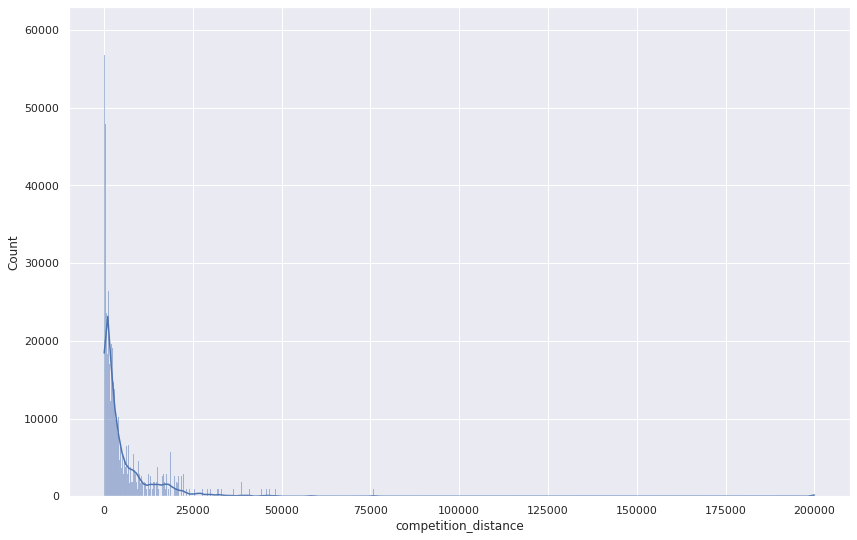

In [27]:
# notice that the huge kurtosis indicates that there is a big peak in the graph
# and that the great positive skew indicates that there is a deformation to the right

cd_plot = sns.histplot( df1["competition_distance"], kde=True )


### 1.7.2 Categorical attributes

In [29]:
# how many unique attributes
cat_attributes.apply(lambda x: x.unique().shape[0])

state_holiday      4
store_type         4
assortment         3
promo_interval     4
curr_month        10
dtype: int64

<AxesSubplot:xlabel='assortment', ylabel='sales'>

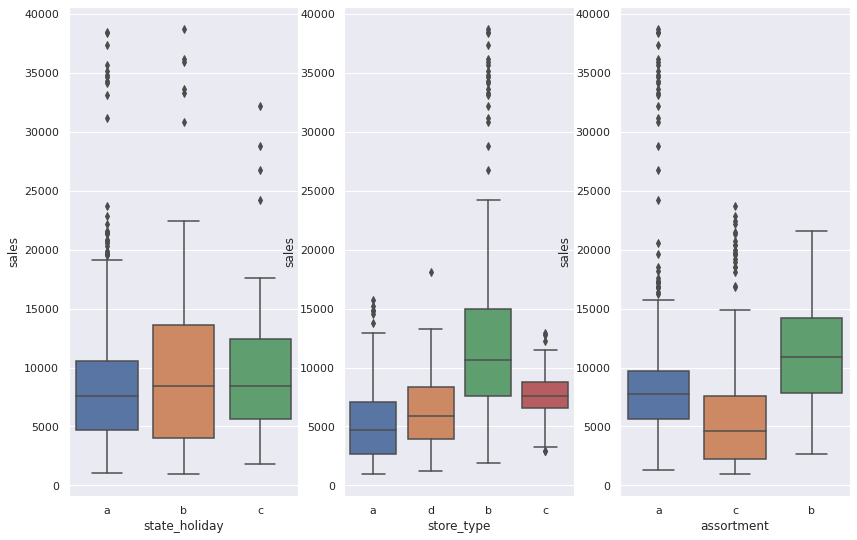

In [30]:
# filtering out the days that had not have holidays (0) and the sales that were 0, the data that happend in days
# that the stores were closed, possibly that closed during the holiday
aux1 = df1[(df1["state_holiday"] != "0") & (df1["sales"] > 0)]

# plt.subplot to separete the screen and 1, 3, 1 => 1 line, 3 columns, this one in the first position
plt.subplot(1, 3, 1)
sns.boxplot( x="state_holiday", y="sales", data=aux1)

plt.subplot(1, 3, 2)
sns.boxplot( x="store_type", y="sales", data=aux1)

plt.subplot(1, 3, 3)
sns.boxplot( x="assortment", y="sales", data=aux1)